In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [5]:
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\TopMentor\KNN_Regressor\bangalore house price prediction OHE-data.csv")

In [7]:
# Step 2: Separate Features and Target
X = df.drop("price", axis=1)
y = df["price"]

# Optional: Check for missing values (final check)
print("Missing values:\n", df.isnull().sum().sort_values(ascending=False).head())


Missing values:
 bath                          0
location_Green Glen Layout    0
location_Kadugodi             0
location_Mysore Road          0
location_Talaghattapura       0
dtype: int64


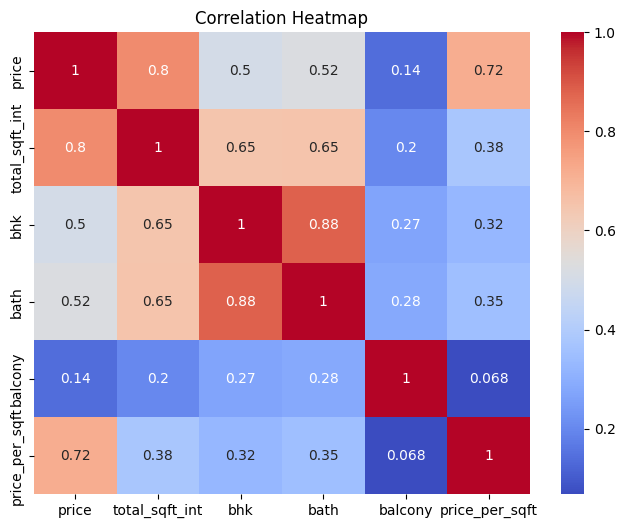

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[["price", "total_sqft_int", "bhk", "bath", "balcony", "price_per_sqft"]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

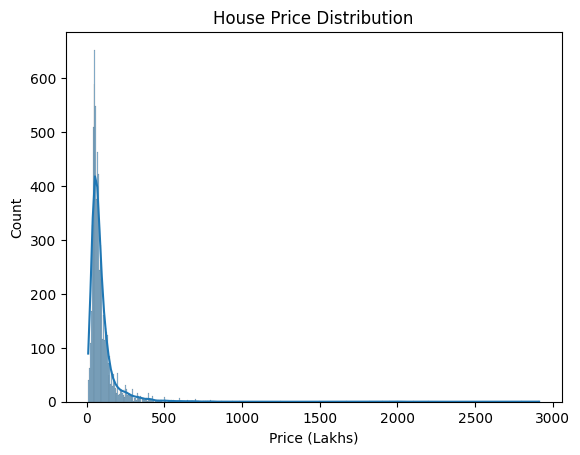

In [9]:
sns.histplot(df["price"], kde=True)
plt.title("House Price Distribution")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.show()

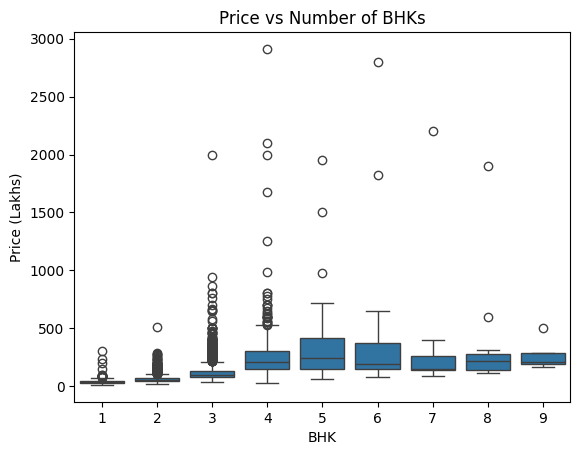

In [10]:
sns.boxplot(x="bhk", y="price", data=df)
plt.title("Price vs Number of BHKs")
plt.xlabel("BHK")
plt.ylabel("Price (Lakhs)")
plt.show()

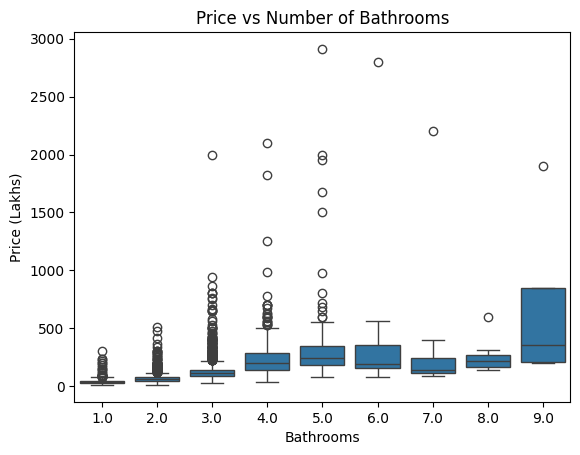

In [11]:
sns.boxplot(x="bath", y="price", data=df)
plt.title("Price vs Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Price (Lakhs)")
plt.show()

In [12]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 5: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict and Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.8488


In [14]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

results = []

# A. Raw Model
results.append(["Raw", r2_score(y_test, model.predict(X_test))])

# B. Standard Scaled Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
r2_scaled = r2_score(y_test, model_scaled.predict(X_test_scaled))
results.append(["Standard Scaled", r2_scaled])

# C. Power Transformed Model
pt = PowerTransformer()
X_train_pt = pt.fit_transform(X_train + 1e-5)
X_test_pt = pt.transform(X_test + 1e-5)

model_pt = LinearRegression()
model_pt.fit(X_train_pt, y_train)
r2_pt = r2_score(y_test, model_pt.predict(X_test_pt))
results.append(["Power Transformed", r2_pt])

# Step 6: R² Table
r2_df = pd.DataFrame(results, columns=["Model", "R² Score"])
print(r2_df)

               Model  R² Score
0                Raw  0.848791
1    Standard Scaled  0.848791
2  Power Transformed  0.529610


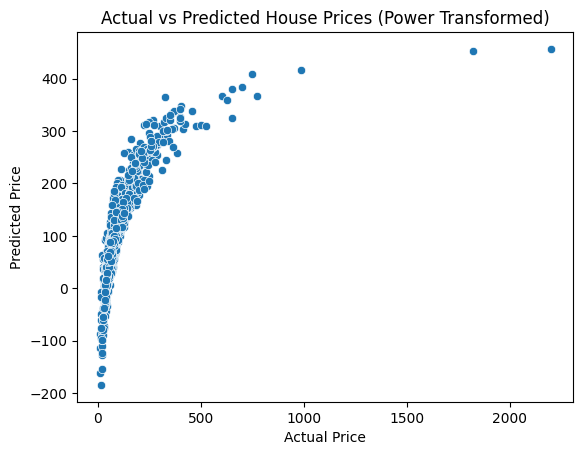

In [15]:
sns.scatterplot(x=y_test, y=model_pt.predict(X_test_pt))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices (Power Transformed)")
plt.show()